# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in `pierce_county_house_sales.csv`, car prices in `cars_hw.csv`, and airbnb rental prices in `airbnb_hw.csv`.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. Use the `sklearn.linear_model.Lasso` to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Question 1
##EDA

In [17]:
cars = pd.read_csv('cars_hw.csv')
cars = cars.drop_duplicates()
cars.dropna(inplace=True)
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [18]:
cars['No_of_Owners'] = cars['No_of_Owners'].astype('string')
cars['No_of_Owners'] = cars['No_of_Owners'].str[0]
cars['No_of_Owners'] = cars['No_of_Owners'].astype('int')
cars['No_of_Owners'].unique()

array([1, 2, 3])

In [3]:
cars.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


##Visualizations

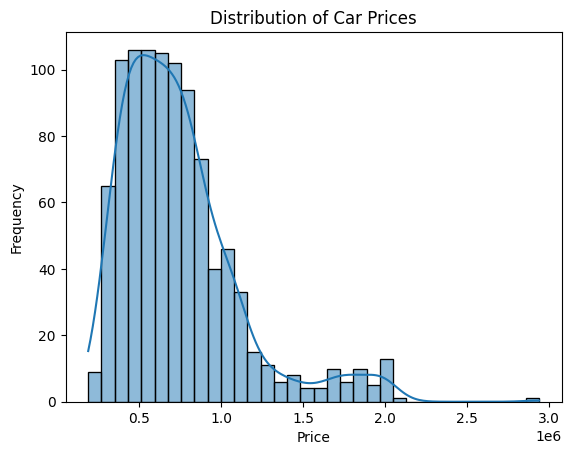

In [19]:
sns.histplot(cars['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Shows that there are not many outliers.

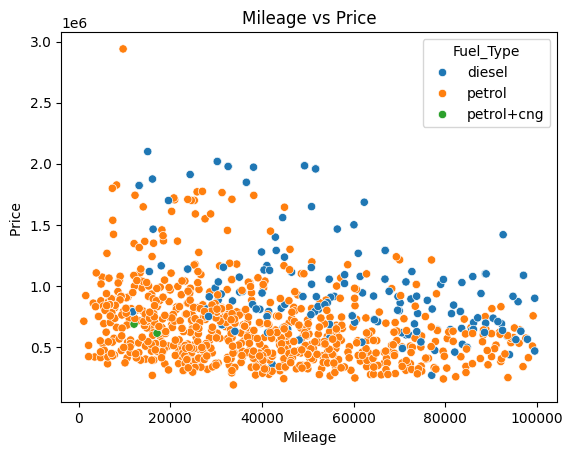

In [20]:
sns.scatterplot(data=cars, x='Mileage_Run', y='Price', hue='Fuel_Type')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price ')
plt.show()

Mileage has minimal impact on price and diesel tends to be more expensive than petrol.

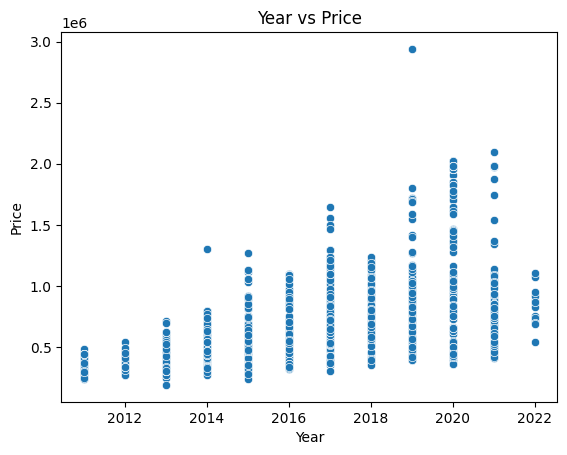

In [21]:
sns.scatterplot(data=cars, x='Make_Year', y='Price')
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Newer cars tend to be more expensive.

#Question 2

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [39]:
X = cars.drop(columns=['Price'])
y = cars['Price']

cat_col = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission_Type']
num_col = ['Mileage_Run', 'Make_Year', 'No_of_Owners', 'Seating_Capacity']

In [24]:
pre = ColumnTransformer(transformers=
 [('cat', OneHotEncoder(drop='first'), cat_col),
  ('num', StandardScaler(), num_col)])

In [25]:
X_transformer = pre.fit_transform(X)
print(X_transformer.shape)

(976, 40)


#Question 3

In [26]:
from sklearn.model_selection import train_test_split

X = cars.drop(columns=['Price'])
y = cars['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Question 4

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
model1 = LinearRegression()
model1.fit(X_train[['Mileage_Run']], y_train)

y_train_pred1 = model1.predict(X_train[['Mileage_Run']])
y_test_pred1 = model1.predict(X_test[['Mileage_Run']])

rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)

print('Model 1: Price vs Mileage')
print('RMSE Train:', rmse_train1)
print('RMSE Test:', rmse_test1)
print('R^2 Train:', r2_train1)
print('R^2 Test:', r2_test1)

Model 1: Price vs Mileage
RMSE Train: 369437.23206086224
RMSE Test: 330349.98245800147
R^2 Train: 0.022185952432653644
R^2 Test: 0.048514305445613526


In [29]:
model2 = LinearRegression()
model2.fit(X_train[['Mileage_Run', 'No_of_Owners']], y_train)

y_train_pred2 = model2.predict(X_train[['Mileage_Run', 'No_of_Owners']])
y_test_pred2 = model2.predict(X_test[['Mileage_Run', 'No_of_Owners']])

rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
r2_train2 = r2_score(y_train, y_train_pred2)
r2_test2 = r2_score(y_test, y_test_pred2)

print('Model 2: Price vs Mileage and Number of Owners')
print('RMSE Train:', rmse_train2)
print('RMSE Test:', rmse_test2)
print('R^2 Train:', r2_train2)
print('R^2 Test:', r2_test2)

Model 2: Price vs Mileage and Number of Owners
RMSE Train: 366009.95268653217
RMSE Test: 329884.8920506598
R^2 Train: 0.04024421427474689
R^2 Test: 0.05119155915957574


In [30]:
model3 = LinearRegression()
model3.fit(X_train[['Mileage_Run', 'No_of_Owners', 'Make_Year']], y_train)

y_train_pred3 = model3.predict(X_train[['Mileage_Run', 'No_of_Owners', 'Make_Year']])
y_test_pred3 = model3.predict(X_test[['Mileage_Run', 'No_of_Owners', 'Make_Year']])

rmse_train3 = np.sqrt(mean_squared_error(y_train, y_train_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_test_pred3))
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)

print('Model 3: Price vs Mileage and Number of Owners and Make Year')
print('RMSE Train:', rmse_train3)
print('RMSE Test:', rmse_test3)
print('R^2 Train:', r2_train3)
print('R^2 Test:', r2_test3)

Model 3: Price vs Mileage and Number of Owners and Make Year
RMSE Train: 310309.7359700456
RMSE Test: 284245.6010352081
R^2 Train: 0.31013239400744363
R^2 Test: 0.29556456900801464


Model 3 is the model that performs the best as it has the lowest RMSE values and highest R2 values.

#Question 5

**Milage_Run**

In [31]:
X = cars[num_col]
y = cars['Price']

var = 'Mileage_Run'
x_k = X[var]
X_mk = X.drop(columns=[var])

reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
r_y = y - reg_y.predict(X_mk)

reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k)
r_x = x_k - reg_k.predict(X_mk)

reg = LinearRegression().fit(r_x.to_numpy().reshape(-1,1), r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1,1), r_y.to_numpy()))

Partial R^2:  0.023399937541758065


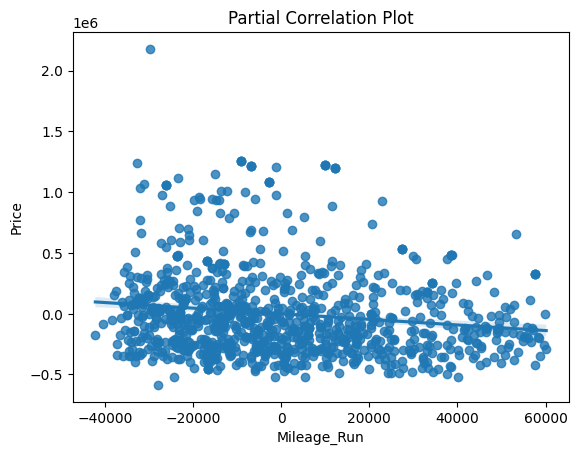

In [32]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

**No_of_Owners**

In [33]:
X = cars[num_col]
y = cars['Price']

var = 'No_of_Owners'
x_k = X[var]
X_mk = X.drop(columns=[var])

reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
r_y = y - reg_y.predict(X_mk)

reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k)
r_x = x_k - reg_k.predict(X_mk)

reg = LinearRegression().fit(r_x.to_numpy().reshape(-1,1), r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1,1), r_y.to_numpy()))

Partial R^2:  0.01591411268250953


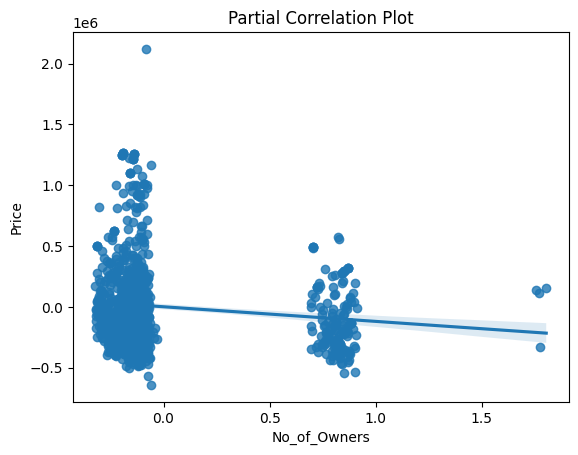

In [34]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

**Make_Year**

In [35]:
X = cars[num_col]
y = cars['Price']

var = 'Make_Year'
x_k = X[var]
X_mk = X.drop(columns=[var])

reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
r_y = y - reg_y.predict(X_mk)

reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k)
r_x = x_k - reg_k.predict(X_mk)

reg = LinearRegression().fit(r_x.to_numpy().reshape(-1,1), r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1,1), r_y.to_numpy()))

Partial R^2:  0.023998129777933364


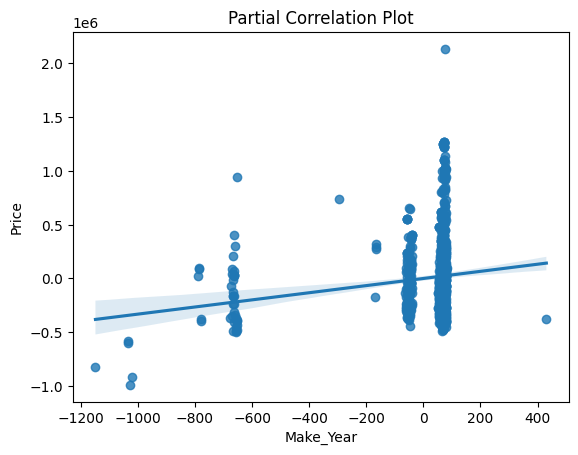

In [36]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

Yes there are some significant non-linearities

This is because the number of owners and the make year do not have linear data.

#Question 6

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)

preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', poly)
    ]), num_col),
    ('cat', OneHotEncoder(drop='first'), cat_col)
])

model_complex = Pipeline([
    ('preprocess', preprocess),
    ('model', LinearRegression())
])

model_complex.fit(X_train, y_train)

y_train_pred = model_complex.predict(X_train)
y_test_pred = model_complex.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Complex Model Results:")
print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)
print("R^2 Train:", r2_train)
print("R^2 Test:", r2_test)

Complex Model Results:
RMSE Train: 146153.32514096404
RMSE Test: 154063.56923972897
R^2 Train: 0.846964442611329
R^2 Test: 0.7930556388808458


Within the more complex model both the test and train R^2 had improved. This shows that for data that does not have a linear shape it is better to process this data in a more complex way. Furthermore, the RMSE were lowered demonstrating that the data was better fit in this model too.  

### Question 7

After cleaning our data and creating visualizations in Q1, we were able to determine that newer cars tend to be more expensive, diesel is more expensive than petrol, and mileage is not strongly related to price. Questions 2 and 3 helped us prepare our data for later analysis. In Q4, we made linear models with 1-3 predictors. From the RMSE and $R^2$ values of each model, we determined that adding predictors was improving model performance. The model that performed the best on test data used Mileage, Number of Owners, and Make Year to predict Price. We used partial correlation plots to check for non-linear relationships. We found that Make Year and Number of Owners have non-linear relationships with Price. This means that linear models might not accurately represent their relationship with Price. Next, we introduced transformations and interactions to build a more complex model. Our more complex model led to a lower RMSE and higher $R^2$ indicating a strong performance. However if we were to complicate the model further we may end up with a model that will overfit to the training data and perform poorly on the test data. On the other hand, if we were to use model 1, our simplest model, that would resulting in underfitting because there are relations between predictors and Price that would go uncaptured.

### Question 8

In [44]:
from sklearn.linear_model import LassoCV

lasso_pipeline = Pipeline([
    ('preprocess', preprocess),  # ColumnTransformer from Q6
    ('lasso', LassoCV(cv=5, random_state=42, max_iter=10000))
])

# Fit Lasso
lasso_pipeline.fit(X_train, y_train)

# --- Extract transformed feature names ---
# Numeric polynomial features
num_pipeline = preprocess.named_transformers_['num']  # scaler + poly pipeline
poly = num_pipeline.named_steps['poly']
poly_feature_names = poly.get_feature_names_out(num_col)  # includes combinations

# Categorical one-hot encoded features
cat_encoder = preprocess.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(cat_col)

# Combine all feature names
feature_names = np.concatenate([poly_feature_names, cat_feature_names])

# Lasso coefficients
lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_

# Create DataFrame of selected features
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefs
})
selected_features = coef_df[coef_df['Coefficient'] != 0]
print("Selected features by Lasso:\n", selected_features)

# --- Compute RMSE and R² ---
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nLasso Model Results:")
print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)
print("R^2 Train:", r2_train)
print("R^2 Test:", r2_test)

Selected features by Lasso:
                           Feature    Coefficient
1                       Make_Year  139282.528644
2                    No_of_Owners    -120.706730
3                Seating_Capacity   38558.534037
4                   Mileage_Run^2   -8502.882232
5           Mileage_Run Make_Year    6177.839999
6        Mileage_Run No_of_Owners     891.512863
7    Mileage_Run Seating_Capacity     112.894854
8                     Make_Year^2    6269.004862
9          Make_Year No_of_Owners   -2031.582143
11                 No_of_Owners^2   -7235.385769
12  No_of_Owners Seating_Capacity   -4093.430703
13             Seating_Capacity^2   -5162.154110
15                      Make_Ford -141113.537452
19                       Make_Kia  236816.290055
20                 Make_MG Motors  567320.055045
22             Make_Maruti Suzuki  -76100.961986
24                   Make_Renault -209380.690317
25                     Make_Skoda  149123.828949
29                    Color_black   3080